In [ ]:
'''Comparing If Historical Revenue Prices has an impact on stock price, Using Tesla & Gamestop as the
    two companies we're comparing
'''

In [4]:
#Using Yfinance library for the companies stock prices
!pip install yfinance

In [34]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import lxml

In [79]:
#Getting Tesla Stock Prices using Yfinance
tesla_stocks = yf.Ticker('TSLA')
tesla_info = tesla_stocks.history(period='max')


In [80]:
tesla_info.reset_index(inplace=True)
tesla_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


<AxesSubplot:xlabel='Date', ylabel='Close'>

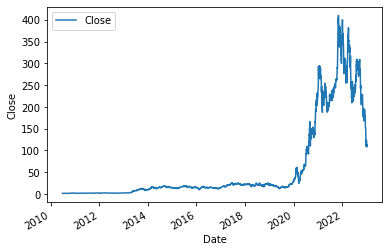

In [74]:
#Showing Tesla Stock Price closing values graphically
tesla_info.plot(x ='Date', xlabel ='Date', y='Close', ylabel ='Close')

In [51]:
#Getting Tesla Historical Revenue Data using bs4 BeautifulSoup library
request = requests.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue')
request.status_code

200

In [52]:
soup = BeautifulSoup(request.text, 'html.parser')
soup.find_all('tbody')[1].find_all('tr')[0].find_all('td')[1].text

'$21,454'

In [53]:
soup.find_all('tbody')[1].find_all('tr')[0].find_all('td')

[<td style="text-align:center">2022-09-30</td>,
 <td style="text-align:center">$21,454</td>]

In [54]:
columns = ['Date', 'Revenue']
tesla_revenue_table = pd.DataFrame(columns = ['Date', 'Revenue'])
tesla_revenue_table

,Date,Revenue


In [55]:
#Attaching the Tesla html Revenues values to the DataFrame
for data in soup.find_all('tbody')[1].find_all('tr'):
    date = data.find_all('td')[0].text
    revenue = data.find_all('td')[1].text
    
    tesla_revenue_table = tesla_revenue_table.append(
    {
        'Date': date,
        'Revenue': revenue
    },
        ignore_index = True
    )
    
tesla_revenue_table

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [56]:
#Removing the $ sign so the numbers can be compared
tesla_revenue_table["Revenue"] = tesla_revenue_table['Revenue'].str.replace(',|\$',"")

/var/folders/23/tsn7lnqj6111x91755cnd4sw0000gn/T/ipykernel_35388/2555687920.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue_table["Revenue"] = tesla_revenue_table['Revenue'].str.replace(',|\$',"")


In [57]:
tesla_revenue_table

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [58]:
#Removing the blank and na values in the dataframe
tesla_revenue_table.dropna(inplace = True)
tesla_revenue_table = tesla_revenue_table[tesla_revenue_table['Revenue'] != ""]
tesla_revenue_table

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [59]:
tesla_revenue_table.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [60]:
#Getting Gamestop Stock Prices using Yfinance
gamestop = yf.Ticker('GME')
gamestop_stock_info = gamestop.history(period='max')
gamestop_stock_info.reset_index(inplace=True)
gamestop_stock_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


<AxesSubplot:xlabel='Date', ylabel='Close'>

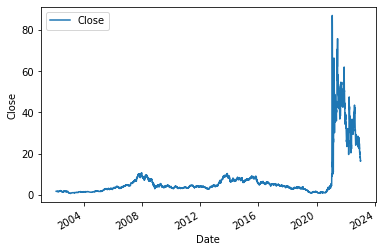

In [75]:
#Showing Gamestop Stock Price closing values graphically
gamestop_stock_info.plot(x ='Date', xlabel ='Date', y='Close', ylabel ='Close')

In [61]:
#Getting Gamestop Historical Revenue Data using bs4 BeautifulSoup library
data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html')
data.status_code

200

In [62]:
soup = BeautifulSoup(data.text, 'html.parser')
soup.find_all('tbody')[1].find_all('tr')[0].find_all('td')[1]

<td style="text-align:center">$1,021</td>

In [63]:
#Using the pandas library methods to read the table from the url
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_gs_panda = pd.read_html(url) 
gamestop_revenue = html_gs_panda[1]

In [64]:
gamestop_revenue = gamestop_revenue.rename(columns = {'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1' : 'Revenue'})

In [65]:
#Removing the $ sign so the numbers can be compared
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(',|\$', '')
gamestop_revenue

/var/folders/23/tsn7lnqj6111x91755cnd4sw0000gn/T/ipykernel_35388/535963996.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(',|\$', '')


,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


In [66]:
#Removing the blank and na values in the dataframe
gamestop_revenue.dropna(inplace = True)
gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]
gamestop_revenue

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


In [67]:
gamestop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [68]:
!pip install plotly

In [69]:
#Importing the plotyly library for use in the function below
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [76]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [77]:
make_graph(tesla_info, tesla_revenue_table, 'Tesla')

In [78]:
make_graph(gamestop_stock_info, gamestop_revenue, 'GameStop')